## Random Forest Project - Lending Club data
For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. Csv provided has already been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv("loan_data.csv")

In [3]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
loans.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


## Exploratory Data Analysis
* To better understand the data

Text(0.5, 0, 'FICO')

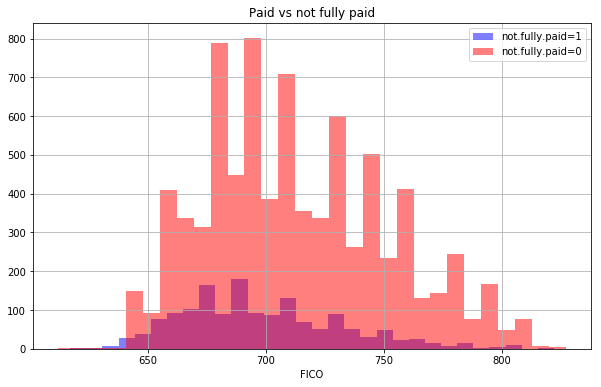

In [6]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.title("Paid vs not fully paid")
plt.legend()
plt.xlabel('FICO')

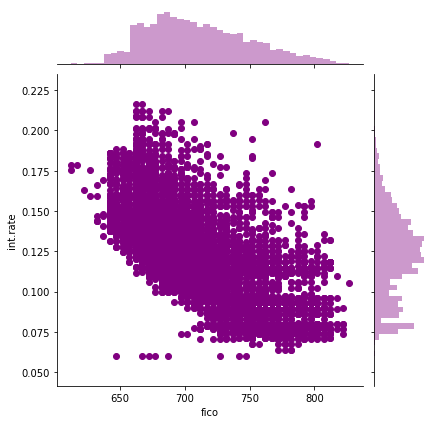

In [7]:
#See relationship between FICO score and int.rate
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

<Figure size 864x504 with 0 Axes>

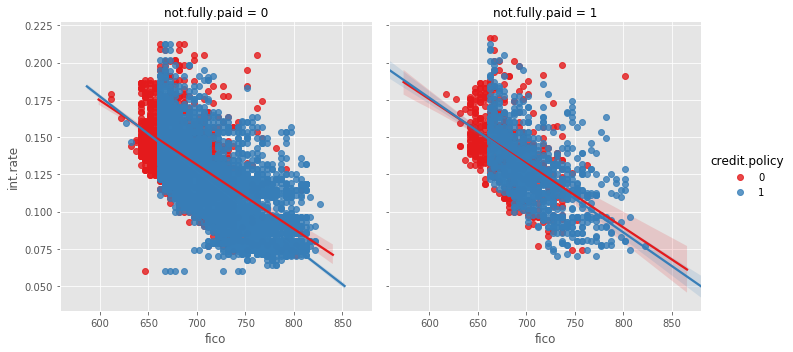

In [11]:
#Relationship between FICO and paid/not fully paid
plt.style.use("ggplot")
plt.figure(figsize=(12,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

### Transforming categorical variables


In [12]:
cat_feats = ['purpose']
df = pd.get_dummies(loans, columns=cat_feats, drop_first=True) 

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

[[2006  425]
 [ 338  105]]


In [32]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' 
    #       using .fit(training_features[:], training_labels[:])
    learner = learner
    learner.fit(X_train, y_train)
    predictions = learner.predict(X_test)
    
    print("\n")
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results


In [37]:
clf_A = DecisionTreeClassifier()
clf_B = RandomForestClassifier()
clf_C = SVC()

samples_10, samples_50,samples_100 = int(len(y_train) * 0.1), int(len(y_train) * 0.5), len(y_train)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_10, samples_50,samples_100]):  
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)



              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[1985  446]
 [ 339  104]]
DecisionTreeClassifier trained on 670 samples.


              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874

[[1994  437]
 [ 339  104]]
DecisionTreeClassifier trained on 3352 samples.


              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy               

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)




              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.36      0.06      0.10       443

    accuracy                           0.84      2874
   macro avg       0.61      0.52      0.50      2874
weighted avg       0.78      0.84      0.79      2874

[[2387   44]
 [ 418   25]]
RandomForestClassifier trained on 670 samples.


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.26      0.04      0.07       443

    accuracy                           0.83      2874
   macro avg       0.55      0.51      0.49      2874
weighted avg       0.76      0.83      0.78      2874

[[2379   52]
 [ 425   18]]
RandomForestClassifier trained on 3352 samples.


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.32      0.05      0.08       443

    accuracy               

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

[[2431    0]
 [ 443    0]]
SVC trained on 670 samples.


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

[[2431    0]
 [ 443    0]]
SVC trained on 3352 samples.


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)




              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

[[2431    0]
 [ 443    0]]
SVC trained on 6704 samples.


c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Seems like RFC and SVC are more accurate, as compared to DecisionTreeClassifier

In [38]:
#Finding better parameters
from sklearn.model_selection import GridSearchCV

RFC_param_grid = {'n_estimators': [5,10,20,50], 'max_depth': [10,20,100]}
SVC_param_grid = {'C':[1,2,10], 'gamma':[.01,.1,.5,1,2]}

#RFC
grid = GridSearchCV(clf_B, RFC_param_grid, verbose=2)   
grid.fit(X_train,y_train)    #find best parameter and estimator (C and gamma)
print("\n")
print(grid.best_params_)
print(grid.best_estimator_)
print("\n")
grid_predictions = grid.predict(X_test)

#Evaluation
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

#SVC
grid = GridSearchCV(clf_C, SVC_param_grid, verbose=2)   
grid.fit(X_train,y_train)    #find best parameter and estimator (C and gamma)
print("\n")
print(grid.best_params_)
print(grid.best_estimator_)
print("\n")
grid_predictions = grid.predict(X_test)

#Evaluation
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=10, n_estimators=5 ....................................
[CV] ..................... max_depth=10, n_estimators=5, total=   0.0s
[CV] max_depth=10, n_estimators=5 ....................................
[CV] ..................... max_depth=10, n_estimators=5, total=   0.0s
[CV] max_depth=10, n_estimators=5 ....................................
[CV] ..................... max_depth=10, n_estimators=5, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] .................... max_depth=10, n_estimators=10, total=   0.0s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] .................... max_depth=10, n_estimators=10, total=   0.1s
[CV] max_depth=10, n_estimators=10 ...................................
[CV] .................... max_depth=10, n_estimators=10, total=   0.1s
[CV] max_depth=10, n_estimators=20 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.6s finished




{'max_depth': 10, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[[2006  425]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=1, gamma=0.01 ..................................

c:\users\ivanl\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=1, gamma=0.01, total=   2.2s
[CV] C=1, gamma=0.01 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] .................................. C=1, gamma=0.01, total=   2.2s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   2.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   2.4s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   2.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   2.3s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   2.3s
[CV] C=1, gamma=0.5 ..................................................
[CV] ................................... C=1, gamma=0.5, total=   2.4s
[CV] C=1, gamma=0.5 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.9min finished




{'C': 1, 'gamma': 0.01}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[[2006  425]
 [ 338  105]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



From the previous result, the best model seems to be similar for both SVC and RFC.